In [1]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir("..")

from quantum.trainer import MNIST01QAETrainer

2025-11-21 20:31:41.948472: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-21 20:31:41.971616: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-21 20:31:42.493035: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
trainer = MNIST01QAETrainer()
trainer.train(num_train=50, max_iterations=50, random_seed=42)
print(f"Training completed in {trainer.qae_model.training_time:.2f} seconds.")

2025-11-21 20:31:43.970403: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
0it [00:00, ?it/s]2025-11-21 20:31:44.044440: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:396] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
12418it [00:03, 3300.37it/s]2025-11-21 20:31:47.931543: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
12665it [00:03, 3243.35it/s]
/home/pi/uw/QuantumAutoencode/classical/utils/data_loader.py:62: RuntimeWarning: invalid value encountered in divide
  patched_dataset = patched_dataset / norms


Training completed in 8.14 seconds.


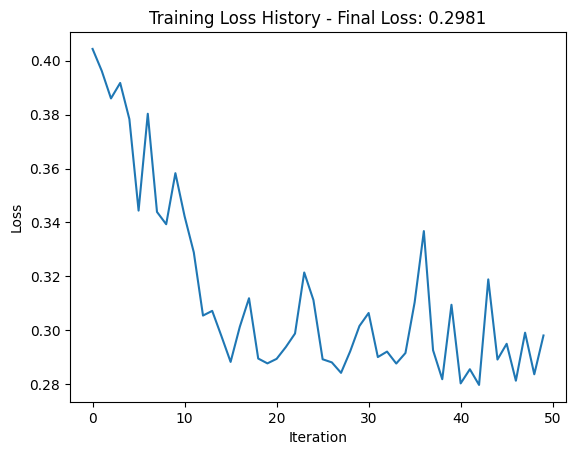

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=trainer.qae_model.training_history)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title(f"Training Loss History - Final Loss: {trainer.qae_model.training_history[-1]:.4f}")
plt.show()

In [4]:
# predict
originals, predictions, mse_errors, fidelities = trainer.evaluate(num_test=10)

1909it [00:00, 3234.82it/s]2025-11-21 20:31:57.056541: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2115it [00:00, 3180.52it/s]
/home/pi/uw/QuantumAutoencode/classical/utils/data_loader.py:62: RuntimeWarning: invalid value encountered in divide
  patched_dataset = patched_dataset / norms
100%|██████████| 10/10 [00:00<00:00, 269.63it/s]


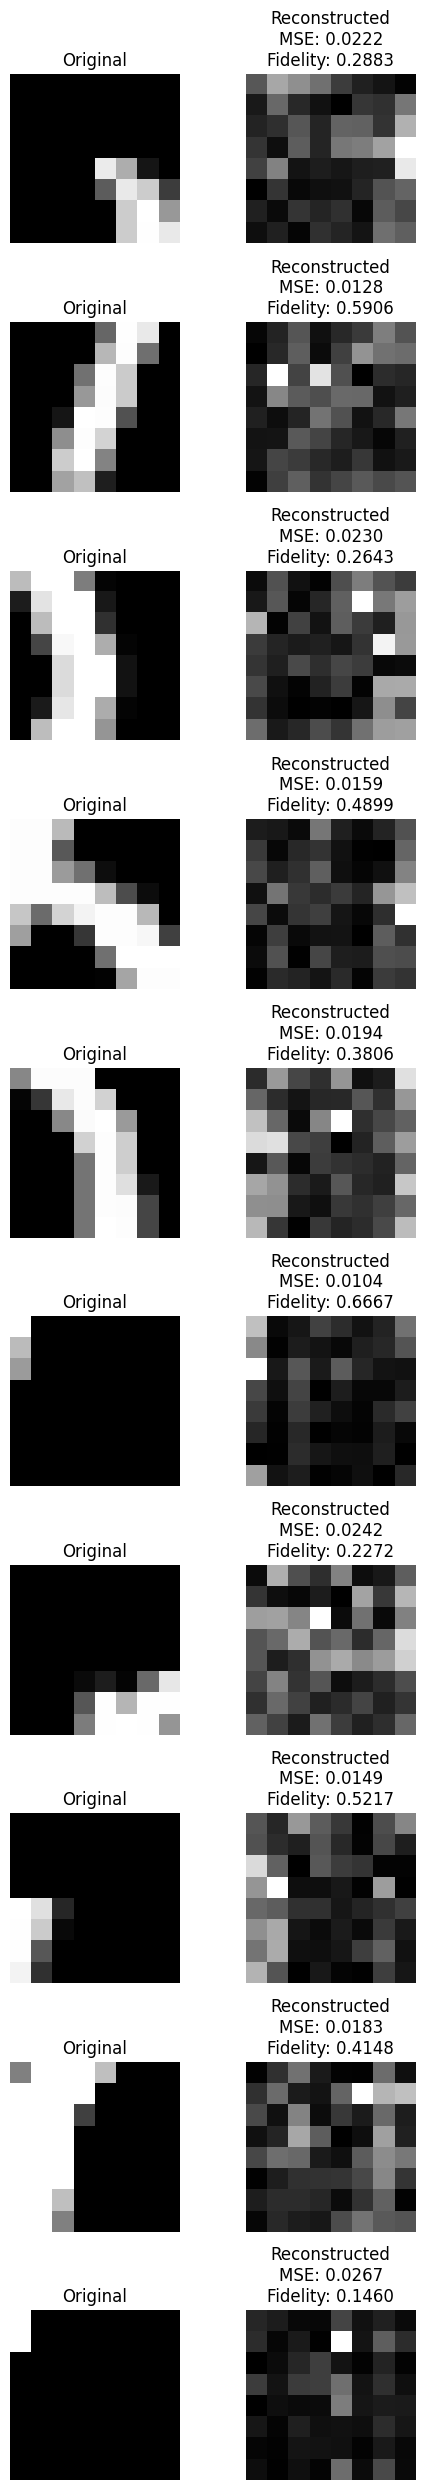

In [7]:
# plot results
fig, axes = plt.subplots(10, 2, figsize=(5, 25))
for i in range(10):
    axes[i, 0].imshow(originals[i].reshape(8, 8), cmap='gray')
    axes[i, 0].set_title("Original")
    axes[i, 0].axis('off')
    axes[i, 1].imshow(predictions[i].reshape(8, 8), cmap='gray')
    axes[i, 1].set_title(f"Reconstructed\nMSE: {mse_errors[i]:.4f}\nFidelity: {fidelities[i]:.4f}")
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()